In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

yt_df = pd.read_csv("./youtube_data.csv", lineterminator='\n')
#yt_df = yt_df.drop(['내용'], axis=1)
yt_df.head()

ValueError: Usecols do not match columns, columns expected but not found: [3, 4]

In [8]:
from eunjeon import Mecab

#형태소 분리 및 품사 태깅
tagger=Mecab()
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

def tagging_text(texts):
    corpus = []
    for text in texts:
        text = tagger.pos(text)
        for i in range(len(text)-1):
            if text[i][1] in significant_tags:
                corpus.append(f"{text[i][0]}/{text[i][1]}")
    return corpus

In [9]:
tagged_corpus = tagging_text(yt_df.comments)

for i in range(5):
    print(tagged_corpus[i])

NotImplementedError: Wrong number or type of arguments for overloaded function 'Tagger_parse'.
  Possible C/C++ prototypes are:
    MeCab::Tagger::parse(MeCab::Model const &,MeCab::Lattice *)
    MeCab::Tagger::parse(MeCab::Lattice *) const
    MeCab::Tagger::parse(char const *)


In [ ]:
import re

p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.')
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX')
p3 = re.compile('[가-힣A-Za-z0-9]+/VV')
p4 = re.compile('[가-힣A-Za-z0-9]+/VX')

In [10]:
# 원형으로 바꾸는 함수
def stemming_text(text):
    corpus = []
    for sent in text:
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        corpus.append(ori_sent)
    return corpus

In [6]:
stem_corpus = stemming_text(tagged_corpus)

for i in range(0, 5):
    print(stem_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [7]:
stopwords = ['이/VCP','있/VA','하/VV','씨/NNB','것/NNB','들/XSN','그/MM','되/VV','수/NNB','이/NP','속/NNG',
'보/VX','않/VX','집/NNG','없/VA','살/VV','나/NP','적/XSN','주/VV','월/NNB','데/NNB','등/NNB','같/VA','안/MAG',
'우리/NP','어떤/MM','때/NNG','내/NP','년/NNB','내/VV','가/VV''한/MM','명/NNB','지/VX','오/VV','말/NNG','일/NNG',
'앞/NNG','번/NNB','나/VX','두/VV','알/VV','개/NNB','받/VV','전/NNG','들/VV','일/NNB','또/MAG','점/NNG','싶/VX',
'더/MAG','말/VX','많/VA','좀/MAG','원/NNB','좋/VA','잘/MAG','크/VA','중/NNB','놓/VX']

In [8]:
def remove_stopword_text(text):
    corpus = []
    for sent in text:
        modi_sent = []
        for word in sent.split(' '):
            if word not in stopwords:
                modi_sent.append(word)
        corpus.append(' '.join(modi_sent))
    return corpus

In [9]:
removed_stopword_corpus = remove_stopword_text(stem_corpus)

for i in range(5):
    print(removed_stopword_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [10]:
comm_df = pd.read_excel("./대화_데이터셋.xlsx")
comm_df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(comm_df, test_size=0.15, random_state=3)
print(len(train))
print(len(test))

23686
4180


   Emotion  count
0        0  18540
1        1   5146


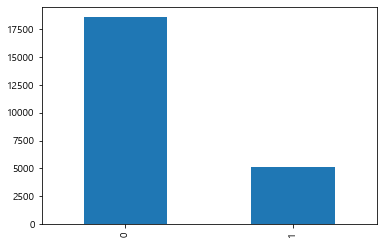

In [12]:
train['Emotion'].value_counts().plot(kind = 'bar')
print(train.groupby('Emotion').size().reset_index(name = 'count'))

In [13]:
import numpy as np

#한글만 남기기
train['Sentence'] = train['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['Sentence'] = test['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train['Sentence'] = train['Sentence'].str.replace('^ +', "")
test['Sentence'] = test['Sentence'].str.replace('^ +', "")
train['Sentence'].replace('', np.nan, inplace = True)
test['Sentence'].replace('', np.nan, inplace = True)

print(len(train))
print(len(test))

23686
4180


In [14]:
from konlpy.tag import Okt

stopwords = ['이','있','하','씨','것','들','그','되','수','이','속','보','않','집','없','살','나','적','주',
'월','데','등','같','안','우리','어떤','때','내','년','내','가''한','명','지','오','말','일','앞','번','나',
'두','알','개','받','전','들','일','또','점','싶','더','말','많','좀','원','좋','잘','크','중','놓']
okt = Okt()
X_train = [] 
X_test = []

# 형태소 분리 및 불용어 제거
for sentence in train['Sentence']:
    temp_X = okt.morphs(str(sentence), stem = True) 
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)
    
for sentence in test['Sentence']:
    temp_X = okt.morphs(str(sentence), stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
# y값 분리
y_train = train['Emotion']
y_test = test['Emotion']

In [17]:
vocab_size = len(tokenizer.word_index)
max_len = max(len(l) for l in X_train)
print(vocab_size)
print(max_len)

18942
112


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [19]:
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.5))
model.add(GRU(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('LDGD.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=500, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1894200   
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         117248    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,110,649
Trainable params: 2,110,649
Non-trainable params: 0
______________________________________________

AttributeError: module 'h5py' has no attribute 'File'

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('LDGD.h5')
print(loaded_model.evaluate(X_test, y_test)[1])